# A1: Logic and lambda calculus

**Name:** Max Boholm (gusbohom)

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the following instructions on [how to work on group assignments](https://github.com/sdobnik/computational-semantics/blob/master/README.md).

Write all your answers and the code in the appropriate boxes below.

## Translating English to logic and evaluating logic in a model

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from utils import display_latex, display_translation, display_tree, display, Markdown
read_expr = nltk.sem.Expression.fromstring

### 1. Propositional logic
Translate the following sentences into **propositional logic** and verify that they parse with Expression.fromstring(). Provide a key which shows how the propositional variables in your translation correspond to expressions of English. Briefly discuss any difficulties you encounter. (By difficulties we mean cases where the semantics of English expressions cannot be expressed to the same degree by the semantics of your logic representations, i.e. they do not mean the same). **[5 + 1 marks]**

In [2]:
propositions = {
    "If Alex plays the piano, she is smart.":
    read_expr('(A -> B)'),
    
    "Alex is both smart and musical.":
    read_expr('(B & C)'),
    
    "If Alex is not smart, Lydia is not happy.":
    read_expr('(-B -> -D)'),
    
    "If Alex or George plays the piano, they are musical.":
    read_expr('((A -> C) | (E -> F))'),
    
    "George plays the piano.":
    read_expr('E'),
}

for text, semrep in propositions.items():
    display_translation(text, semrep)

"If Alex plays the piano, she is smart.": $(A\ \rightarrow\ B)$

"Alex is both smart and musical.": $(B\ \land\ C)$

"If Alex is not smart, Lydia is not happy.": $(-B\ \rightarrow\ -D)$

"If Alex or George plays the piano, they are musical.": $((A\ \rightarrow\ C)\ \lor\ (E\ \rightarrow\ F))$

"George plays the piano.": $E$

|Key|Sentence|
|---|--------|
|A|Alex plays the piano|
|B|Alex is smart|
|C|Alex is musical|
|D|Lydia is happy|
|E|George plays the piano|
|F|George is musical|
|G|Lydia is smart|
|H|Lydia is musical|

*Difficulties encountered:*

Perhaps there is another (obscure) interpretation possible for "If Alex or George plays the piano, they are musical", namely: 

    read_expr('(A | E) -> (C & F)'),



### 2. Valuation of Propositional logic

Imagine that we observe a world where 
- (i) Alex does not play the piano,
- (ii) Alex and Lydia are smart and musical,
- (iii) George is not musical,
- (iv) Lydia is happy,
- (v) George plays the piano. 

Translate this informal description of the world into a model by appropriately defining an evaluation function and evaluate the formulae from Question 1 in this model. Briefly comment the answers you get. **[5 + 1 marks]**.

In [3]:
facts = [
    ('A', False), #Alex play the piano
    ('B', True), #Alex is smart
    ('G', True), #Lydia is smart
    ('C', True), #Alex is musical
    ('H', True), #Lydia is musical
    ('F', False), #George is musical
    ('D', True), #Lydia is happy
    ('E', True) #George plays the piano
]
val = nltk.Valuation(facts)
dom = set()
g = nltk.Assignment(dom)
model = nltk.Model(dom, val)

sentences = [
    'A -> B',
    '(B & C)',
    '(-B -> -D)',
    '((A -> C) | (E -> F))',
    'E'
]

for s in sentences:
    print("'{}' is {}.".format(s, model.evaluate(s, g)))


'A -> B' is True.
'(B & C)' is True.
'(-B -> -D)' is True.
'((A -> C) | (E -> F))' is True.
'E' is True.


All are true.

### 3. Predicate logic *without quantifiers*

Translate the following sentences into predicate-argument formulae of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [4]:
sentences1 = {
    "Lydia likes George but Lydia doesn't like Alex": 
    read_expr(r'like(lydia, george) & -like(lydia, alex)'),
    
    "Lydia likes herself and so does George":
    read_expr(r'like(lydia, lydia) & like(george, lydia)'),
    
    "Charlie is an English pianist who plays a sonata":
    read_expr(r'english(charlie) & pianist(charlie) & play(charlie,sonata)'),
    
    "Lydia and George admire each other":
    read_expr(r'admire(lydia, george) & admire(george, lydia)'),
}

for text, semrep in sentences1.items():
    display_translation(text, semrep)


"Lydia likes George but Lydia doesn't like Alex": $(like(lydia,george)\ \land\ -like(lydia,alex))$

"Lydia likes herself and so does George": $(like(lydia,lydia)\ \land\ like(george,lydia))$

"Charlie is an English pianist who plays a sonata": $(english(charlie)\ \land\ pianist(charlie)\ \land\ play(charlie,sonata))$

"Lydia and George admire each other": $(admire(lydia,george)\ \land\ admire(george,lydia))$

*Difficulties encountered:*

For this excercise, we are not allowed to use quantifiers. Consequently, the VP *plays a sonata* is here analysed as the two-place predicate *play(x,y)*, rather than using a quantifier for the NP. However, we should note an alternative formalization, namely using the the one-place predicate *playsonata(x)*. Logically, this would be allowed, but it would be under-analysed. 

The two-place-predicate solution has an advantage in comparison to the one-place-predicate solution since it captures a shared meaning of VPs such as *play a sonata*, *play a schlager*, and *play a country-western song*, among others. This shared meaning is *not* captured when these VPs are formalized as one-place predicates. Logically speaking, e.g., *playsonata(x)* is as "similar" to *playschlager(x)* as it is to *sleep(x)*. However, the two-place-predicate-formalization has a problem. Because, we are not allowed to use quantifiers, we would plug in a individual constant to translate *Charlie plays a sonata*, e.g., *play(charlie, sonata)* as if the individual Charlie stands in a relationship to another individual *in particular*,  namely sonata. As such, this two-place-predicate-solution does not fit our (or at least not my) intuitive understanding of *Charlie plays a sonata*, since this sentence does not describe a relation between two particulars. Here is why: 

Assume that our domain contains Charlie and two sonata: Beethoven's Piano Sonata No. 29 "Hammerklavier" and Piano Sonata No. 17 "Tempest (we allow for abstract objects in our domain). Next, we formalize *Charlie plays a sonata* as *play(charlie, tempest)*. After all, if Charlie plays Tempest, *Charlie plays a sonata* is true. However, this formulation does not fully capture the truth conditions of the English sentence *Charlie plays a sonata* since it would have been equally true if Charlie played Hammerklavier. So, perhaps the disjunction *play(charlie, tempest) | play(charlie, hammerklavier)* should be our logical translation of *Charlie plays a sonata* (for this particular domain). From a semantic point of view, I would argue "yes", that whould indeed be the proper translation of the sentence for this domain, but this analysis is excessive and impractical, if we extend the domain to all existing sonata. For that domain, we would need a very long disjunction in order to formalise *Charlie plays a sonata* (in fact, it would be as long as there are sonata in our domain). At this point it becomes cleas why existential quantifiers become handy (if we were allowed to use them). The meaning of the existential quantifier is (roughly) such long disjunctions. 

### 4. First order logic with quantifiers

Translate the following sentences into quantified formulas of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [5]:
sentences2 = {
    "Charlie knows a woman who likes George":
    read_expr('exists x. (woman(x) & know(charlie, x) & like(x, george))'),
    
    "George admires everybody and Lydia admires nobody":
    read_expr('all x. (admire(george, x)) & -exists x.(admire(lydia,x))'),

    "Nobody admires everybody":
    read_expr('-(exists x. all y. (admire(x,y)))'),
    
    "Exactly one musician plays everything Alex wrote":
    read_expr('exists x. (musician(x) & all y. (write(alex, y) -> play(x,y) & all z. (musician(z) -> x=z)))'),
}

for text, semrep in sentences2.items():
    display_translation(text, semrep)

"Charlie knows a woman who likes George": $\exists\ x.(woman(x)\ \land\ know(charlie,x)\ \land\ like(x,george))$

"George admires everybody and Lydia admires nobody": $(\forall\ x.admire(george,x)\ \land\ -\exists\ x.admire(lydia,x))$

"Nobody admires everybody": $-\exists\ x.\forall\ y.admire(x,y)$

"Exactly one musician plays everything Alex wrote": $\exists\ x.(musician(x)\ \land\ \forall\ y.(write(alex,y)\ \rightarrow\ (play(x,y)\ \land\ \forall\ z.(musician(z)\ \rightarrow\ (x\ =\ z)))))$

*Difficulties encountered:*

The sentence "Exactly one musician plays everything Alex wrote" is tricky. I hope I got it right!

There is an x such that x is a musician and for all y, if alex write y, x play it (i.e. y); and for every z such that z is a musician, x is equal to z. 

### 5. Valuation of first order logic

We observe a world with entities Lydia, George, Alex, Charlie and Bertie, sonata, etude, prelude, waltz, scherzo.

1. Lydia likes Lydia, George, Alex and Charlie. George likes Lydia, Bertie and George. Alex likes Alex. Charlie likes Lydia, George, Alex, Charlie and Bertie. Bertie likes Alex.
2. Lydia, George, Alex, Charlie and Bertie are English.
3. Charlie and Bertie are pianists.
4. Charlie plays a sonata, an etude and a waltz. Bertie plays a waltz and a scherzo. Lydia plays an etude, a prelude and a waltz.
5. Lydia admires Lydia, Charlie and Bertie. George admires Lydia, George, Alex, Charlie and Bertie. Alex admires Lydia, Alex and Bertie. Charlie admires George and Bertie. Bertie admires Lydia, George, Alex, Charlie and Bertie.
6. Lydia knows Lydia, George, Alex, Charlie and Bertie. George knows Lydia, George and Bertie. Alex knows Lydia, Alex and Bertie. Charlie knows George, Charlie and Bertie. Bertie knows Lydia, George, Alex, Charlie and Bertie.
7. Lydia, Alex and Charlie are women.
8. George and Bertie are men.
9. Alex wrote a sonata, an etude an a waltz.
10. Lydia, Alex, Charlie and Bertie are musicians.

Translate this informal description of the world into a model and evaluate the formulae from Questions 3 and 4 in this model. Briefly comment on the answers you get **[3 + 2 marks]**.

In [6]:
entities = set(['p','t','e','h','r','s','u','l','w','c'])

assign = """
lydia => p
george => t
alex => e
charlie => h
bertie => r
sonata => s
etude => u
prelude => l
waltz => w
scherzo => c
like => {(p, p), (p, t), (p, e), (p, h), (t, p), (t, r), (t, t), (e, e), (h, p), (h, t), (h, e), (h, h), (h, r), (r, e)} 
english => {p, t, e, h, r}
pianist => {h, r}
play => {(h, s), (h, u), (h, w), (r, w), (r, c), (p, u), (p, l), (p, w)}
admire => {(p, p), (p, h), (p, r), (t, p), (t, t), (t, e), (t, h), (t, r), (e, p), (e, e), (e, r), (h, t), (h, r), (r, p), (r, t), (r, e), (r, h), (r, r)}
know => {(p, p), (p, t), (p, e), (p, h), (p, r), (t, p), (t, t), (t, r), (e, p), (e, e), (e, r), (h, t), (h, h), (h, r), (r, p), (r, t), (r, e), (r, h), (r, r)}
woman => {p, e, h}
man => {t, r}
write => {(e, s), (e, u), (e, w)}
musician => {p, e, h, r}
"""

val2 = nltk.Valuation.fromstring(assign)

g2 = nltk.Assignment(entities)
m2 = nltk.Model(entities, val2)

# sentences from question 3
for text, semrep in sentences1.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))

# sentences from question 4
for text, semrep in sentences2.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))


False


$(like(lydia,george)\ \land\ -like(lydia,alex))$

----

True


$(like(lydia,lydia)\ \land\ like(george,lydia))$

----

True


$(english(charlie)\ \land\ pianist(charlie)\ \land\ play(charlie,sonata))$

----

False


$(admire(lydia,george)\ \land\ admire(george,lydia))$

----

True


$\exists\ x.(woman(x)\ \land\ know(charlie,x)\ \land\ like(x,george))$

----

False


$(\forall\ x.admire(george,x)\ \land\ -\exists\ x.admire(lydia,x))$

----

True


$-\exists\ x.\forall\ y.admire(x,y)$

----

False


$\exists\ x.(musician(x)\ \land\ \forall\ y.(write(alex,y)\ \rightarrow\ (play(x,y)\ \land\ \forall\ z.(musician(z)\ \rightarrow\ (x\ =\ z)))))$

----

*Comments on the answers:*

The predicate *know* as in *know a person* is a bit tricky to handle, since you might argue that it is a symmetric relation (a relation *R* is symmetric when *R(x,y)* implies *R(y,x)*). That is, for a person A to genuinely know B, it must also hold that B knows A; otherwise A does not really know B, but perhaps think she does. I ignore this symmetric interpretation of *know* above and assume that A can know B, without B knowing A. (Arguably, the symmetric/non-symmetric interpretation is captured by the prepositional alternation: *know* (symmetric) vs. *know about* (non-symmetric).)

## Lambda calculus

In [7]:
from nltk.grammar import FeatureGrammar

### 6. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [8]:
e1 = read_expr(r'\x.like(x,rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with reuslt like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'\P.P(pip)')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'\P. exists x.(woman(x) & P(x))')
e2 = read_expr(r'\x.play(x,etude)') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'\X \x.X(\z.like(x,z))')
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$play(pip,scherzo)$

$play(pip,scherzo)$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\lambda\ x.\forall\ z_{1}.(musician(z_{1})\ \rightarrow\ like(x,z_{1}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$

### 7. Extending the grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[4 marks]**
- no man gives a bone to the dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [9]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

Write your extension of this grammar here:

In [10]:
fcfg_string = fcfg_string_orginal + r"""
Det[SEM=<\P Q.-exists x.(P(x) & Q(x))>] -> 'no'
Det[SEM=<\P Q.exists x.(all y.(P(y) <-> x=y) & Q(x))>] -> 'the'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=past] -> 'chased'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chased'
CONJ -> 'and'
NP[SEM=<\X.(?npL(X) & ?npR(X))>] -> NP[SEM=?npL] CONJ NP[SEM=?npR]
N[NUM=sg,SEM=<\x.cat(x)>] -> 'cat'
ADJ[SEM=<\x.white(x)>] -> 'white'
ADJ[SEM=<\x.brown(x)>] -> 'brown'
NP[NUM=?n,SEM=<?det(\x.(?nom(x) & ?adj(x)))>] -> Det[SEM=?det] ADJ[SEM=?adj] Nom[NUM=?n,SEM=?nom]
"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

*I have documented some of my reasoning here. Please ignore it, if considered irrelavant.*

# Notes:
## On the meaning of 'no'
'no' means 'it is not the case that there exists someone/thing such that ...'. To implement this, we negate the meaning of `some`. 

## On the meaning of 'the'
What is the semantics of 'the dog'? I here follow the Russellian analysis of definite descriptions (in particular, I was inspired by the formalism by John Slaney, found here: http://users.cecs.anu.edu.au/~jks/LogicNotes/definite-descriptions.html). This is *not* an unprobleatic assumption, though. Nevertheles, the proposition 

1. *The F is G*

is analysed as 

2. ∃x (Fx ∧ Gx) ∧ ∃x∀y (Fy → x=y) 

which can be simplified as 

3. ∃x (∀y (Fy ↔ x=y) ∧ Gx) 

This analysis is implemented in our grammar as:

    Det[SEM=<\P Q.exists x.(all y.(P(y) <-> x=y) & Q(x))>] -> 'the'

**Note To Self (abondoned ideas):**

At first I reasoned that the NP 'the dog' should be analysed as an individual constant (i.e. a name, not a predicate) somehow. Then I came to a different conclusion: 'the dog' is in a sense similar to a pronoun; it referres to some individual that is salient in the discursive or extra-linguistic context (cf. Gundel, J., Hedberg, N., & Zacharski, R. 1993. "Cognitive Status and the Form of Referring Expressions in Discourse". *Language*, 69(2), 274-307). Therefore 'the dog' should be analysed with an individual *variable* and the meaning of *the dog* would then be *dog(x)* (not *dog*). The truth conditions of the sentence 

4. *no man gives a bone to the dog* 

is, following this analysis, undefined: unless we know which dog we are talking about, we do not know the truth of (4). Its logical form must therefore be an open formula (variable *z* is free):

    -exists x.(man(x) & exists y.(bone(y) & dog(z) & give(x,y,z)))

with a meaning of 'the' implemented in the grammar as:

    \P.P(x)

However, for the reason of avoiding open formula, I decided to use Russell's analysis of definite descriptions, instead.


## On the meaning of 'and'
Action predicates with conjunctive subjects (*S1 and S2 do A*) are possibly ambiguous between:

1. S1 does A and S2 does A; and
2. S1 and S2 collectively do A (or: S1 and S2 do A *together*).

Philosophers of collective action have argued that the meaning in (2) is not possible to reduce to that of (1). I here assume that *a boy and a girl chased every dog* can be analysed as (1). To implement this understanding in our grammar, we use the following representation for the conjunction:

    NP[SEM=<\X.(?npL(X) & ?npR(X))>] -> NP[SEM=?npL] CONJ NP[SEM=?npR]

That is, each conjunct is applied on the variable *X* as argument; then, those variables of the conjunction (the *X*s) are bound by the lambda operator. The new lambda expression that resulted from these two steps, in turn, can take part in functional applications of other grammatical rules of our grammar. 

Run the code below without errors:

no man gives a bone to a dog


----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{3}.(dog(z_{3})\ \land\ \exists\ z_{2}.(bone(z_{2})\ \land\ give(x,z_{2},z_{3}))))$

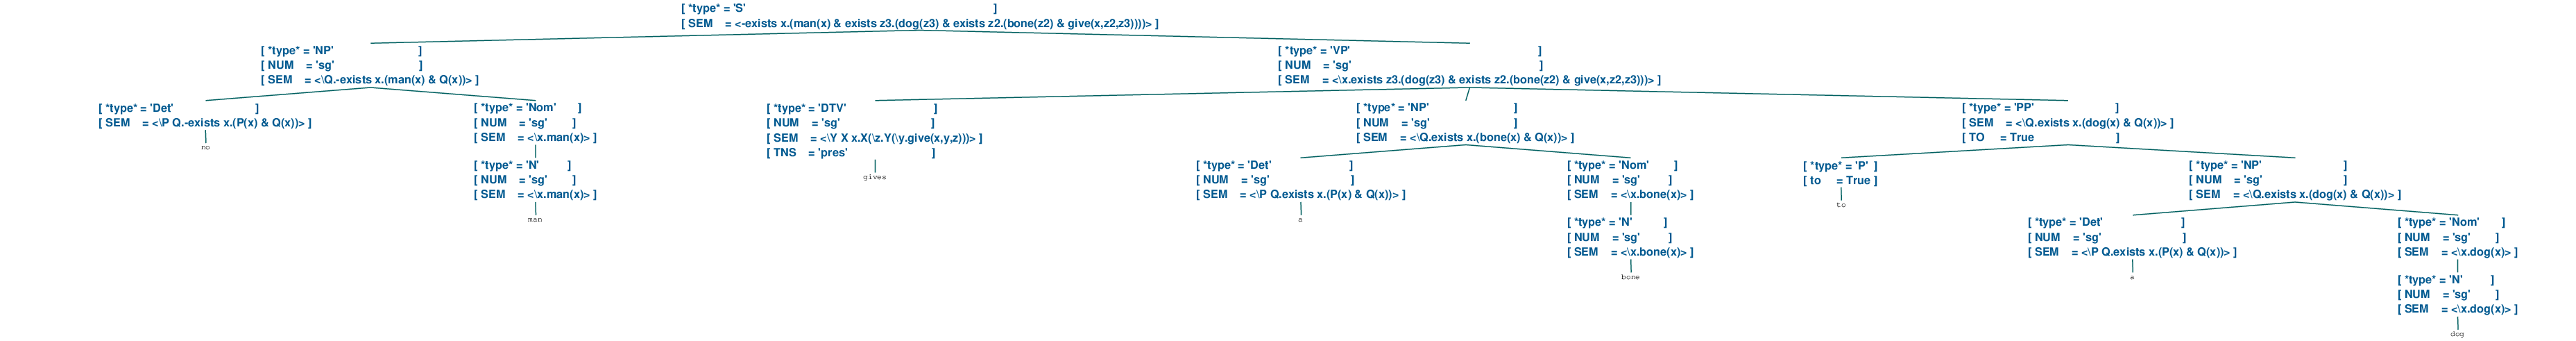

no man gives a bone to the dog


----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{5}.(\forall\ y.(dog(y)\ \leftrightarrow\ (z_{5}\ =\ y))\ \land\ \exists\ z_{4}.(bone(z_{4})\ \land\ give(x,z_{4},z_{5}))))$

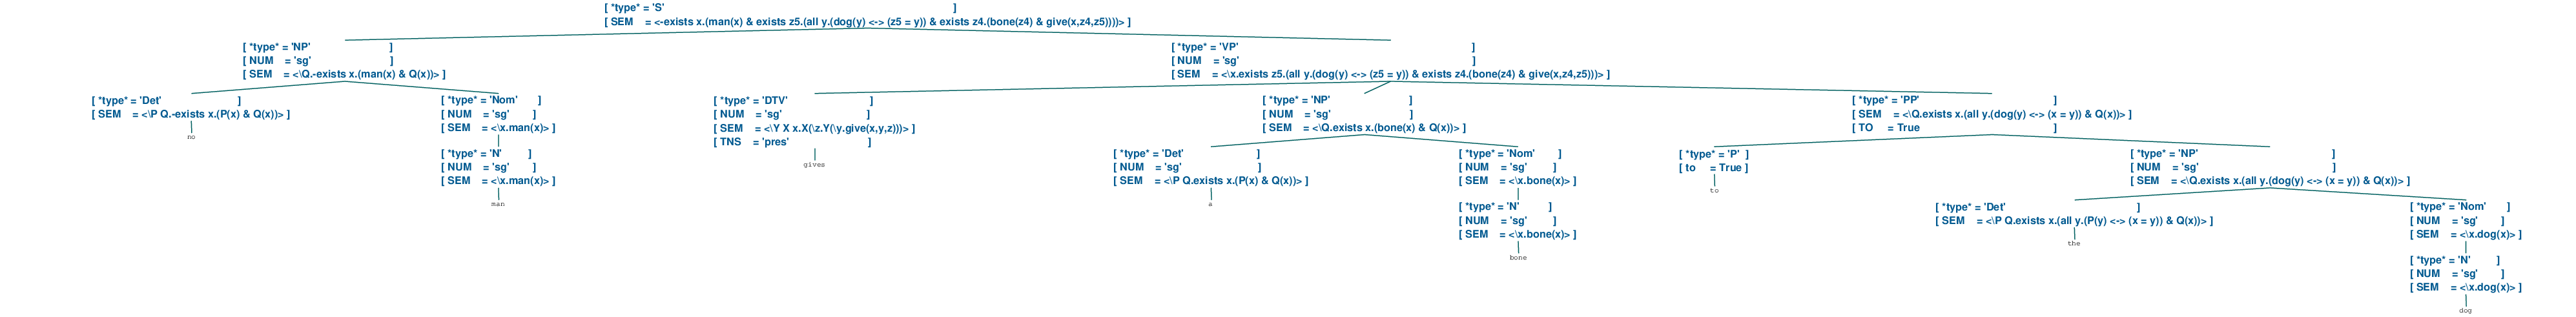

a boy and a girl chased every dog


----

$(\exists\ x.(boy(x)\ \land\ \forall\ z_{7}.(dog(z_{7})\ \rightarrow\ chase(x,z_{7})))\ \land\ \exists\ x.(girl(x)\ \land\ \forall\ z_{7}.(dog(z_{7})\ \rightarrow\ chase(x,z_{7}))))$

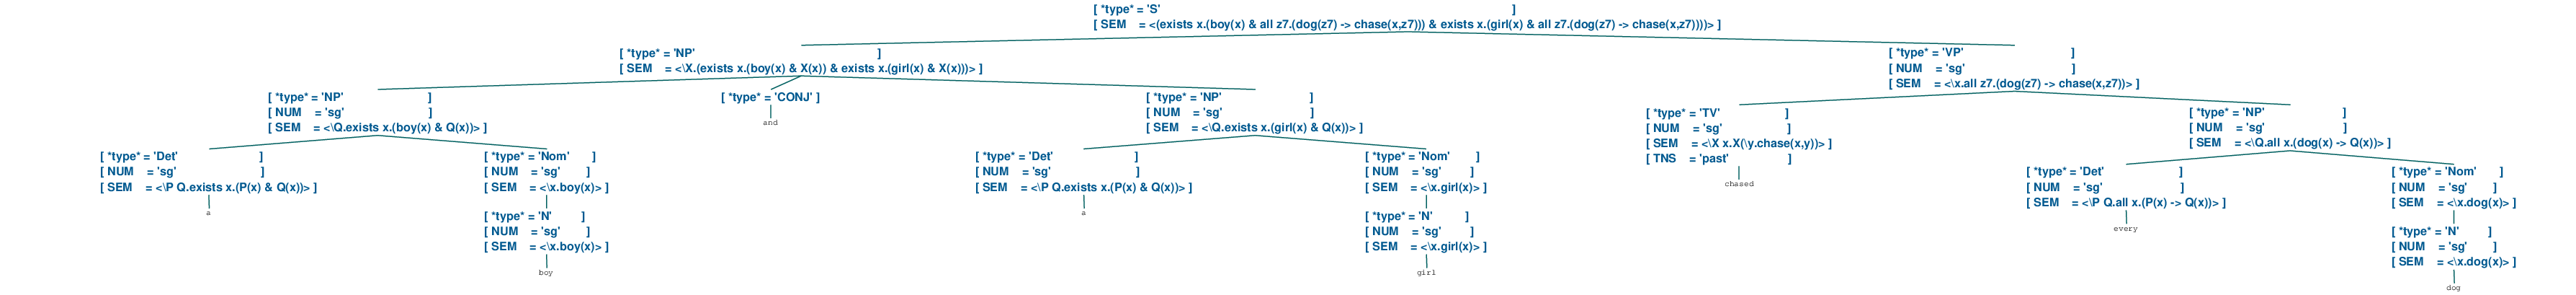

----

$(\exists\ x.(boy(x)\ \land\ \forall\ z_{6}.(dog(z_{6})\ \rightarrow\ chase(x,z_{6})))\ \land\ \exists\ x.(girl(x)\ \land\ \forall\ z_{6}.(dog(z_{6})\ \rightarrow\ chase(x,z_{6}))))$

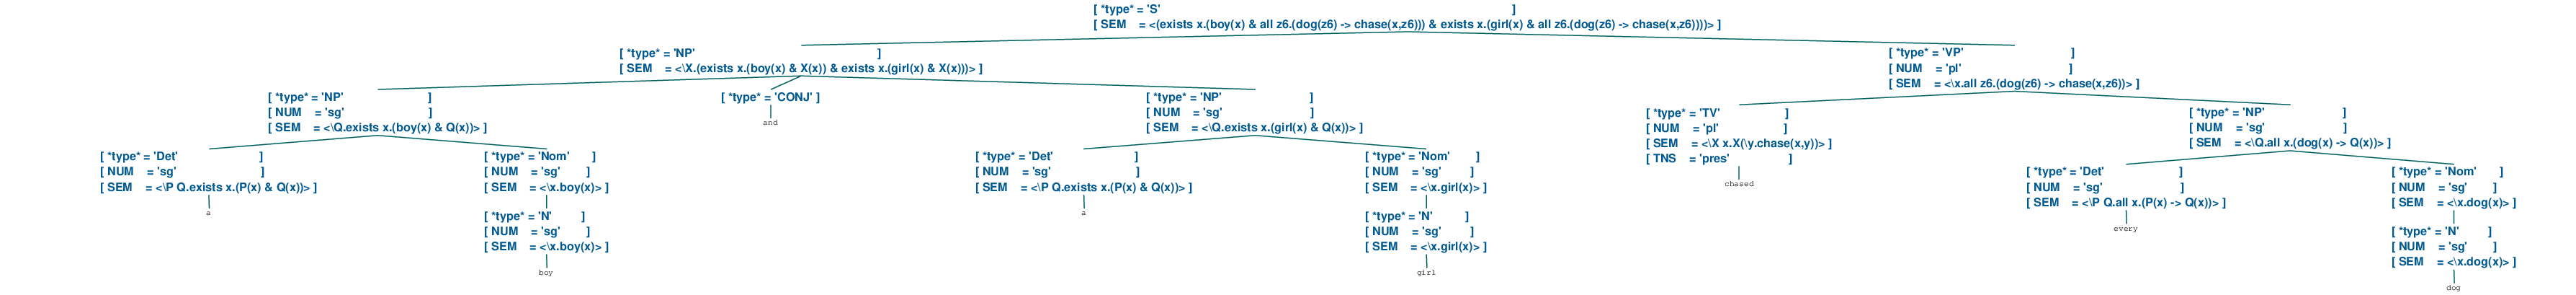

every dog chased a boy and a girl


----

$\forall\ x.(dog(x)\ \rightarrow\ (\exists\ z_{12}.(boy(z_{12})\ \land\ chase(x,z_{12}))\ \land\ \exists\ z_{13}.(girl(z_{13})\ \land\ chase(x,z_{13}))))$

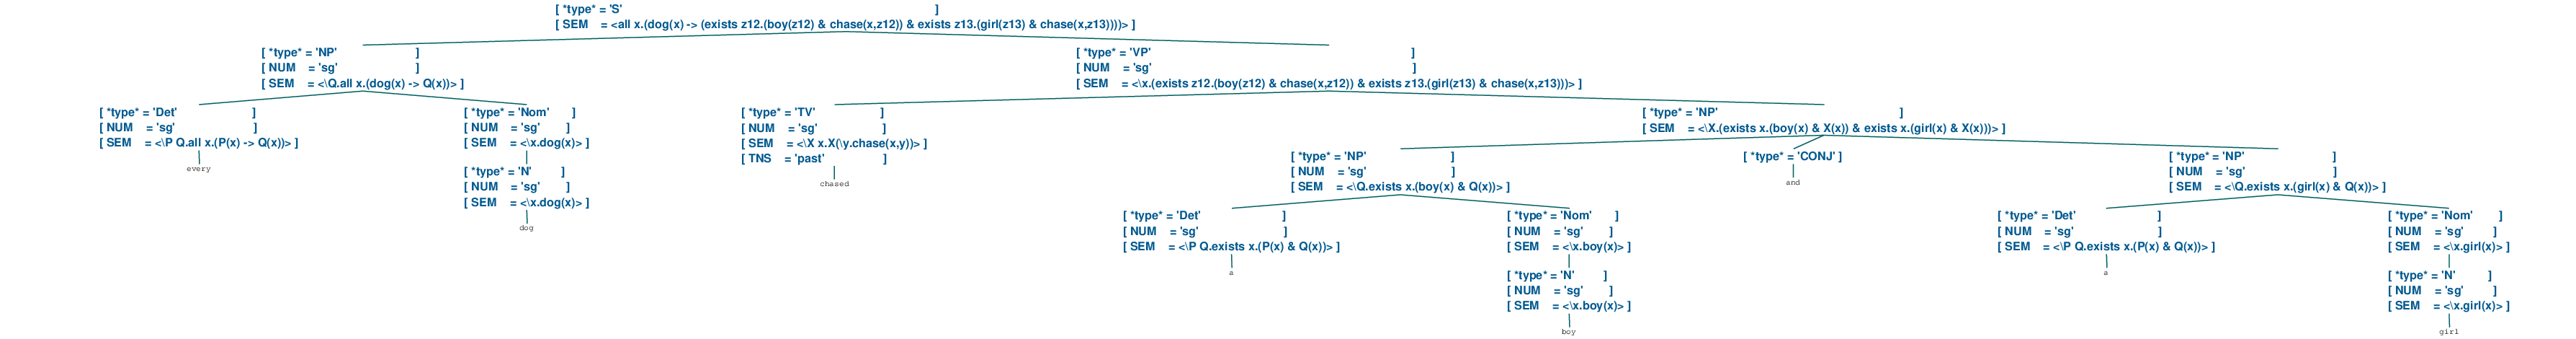

a brown cat chases a white dog


----

$\exists\ x.(cat(x)\ \land\ brown(x)\ \land\ \exists\ z_{14}.(dog(z_{14})\ \land\ white(z_{14})\ \land\ chase(x,z_{14})))$

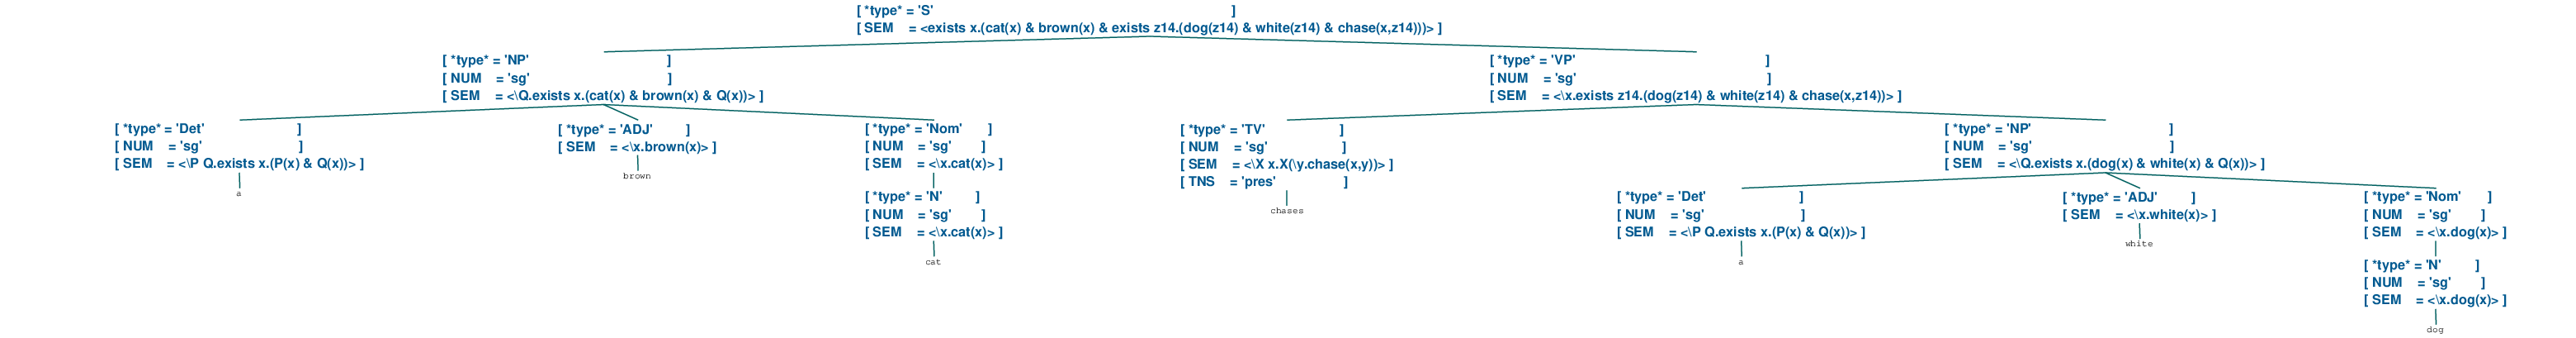

In [11]:
# remove sentences if you couldn't find answer for them
sentences = [
    'no man gives a bone to a dog',
    'no man gives a bone to the dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',    
]


i=0 #M.B. add this
for results in nltk.interpret_sents(sentences, syntax):
    print(sentences[i]) #M.B. added this
    i+=1 #M.B. add this
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

## Marks

This part of the assignment has a total of 47 marks.